## **Práctica 9: Clasificación logística**

Nombre: Alan Francisco Mora González

No. Cuenta: 113005901

Email: alanfmorag@gmail.com

### **Caso de estudio**

Estudios clínicos de diabetes en una población femenina.

**Objetivo.** Clasificar si una persona tiene diabetes o no, en función de otros parámetros disponibles, como número de embarazos, glucosa, presión arterial, índice de masa corporal, los niveles de insulina, entre otros. Este es un problema de clasificación y se requiere obtener el mejor modelo de aprendizaje automático para predecir la diabetes.

**Emplear el algoritmo:** 

* Regresión logística.

**Fuente de datos:**

https://www.kaggle.com/saurabh00007/diabetescsv

**Variables:**

* Número de embarazos (Pregnancies): número de veces que ha estado embarazada la persona.

* Concentración de glucosa en plasma (Glucose): cantidad de glucosa en la sangre. Cuando una persona ha ingerido alimento los valores normales son menores a 140 mg/DL y cuando los resultados se dan entre 140 a 190 son indicativos de diabetes.

* Presión arterial diastólica (BloodPressure): es la cantidad de presión que hay en las arterias ente un latido y otro.

* Espesor del pliegue cutáneo (SkinThickness): es un procedimiento frecuentemente utilizado, en combinación con el índice de masa corporal (IMC), para estimar la grasa corporal. Medir los pliegues cutáneos permite valorar los depósitos de grasa del cuerpo humano. A modo de referencia, según la medicina el espesor normal: ♂ 12 mm; ♀ 23 mm.

* Insulina (Insulin): es una prueba de insulina que consiste analizar antes de administrar la glucosa y 2 horas después. La razón por la que se realizan estas pruebas es para ver la curva de respuesta a la glucosa.

* Índice de masa corporal (BMI): es utilizado para estimar la cantidad de grasa corporal, y determinar si el peso está dentro del rango normal, o por el contrario, se tiene sobrepeso o delgadez.

* Función pedigrí de la diabetes (DiabetesPedigreeFunction): es una función que califica la probabilidad de diabetes según los antecedentes familiares.

* Edad en años (Age).

* Resultado (Outcome): si es positivo o negativo al diagnóstico de diabetes.

### **I. Acceso a datos y selección de características**

#### **1) Acceso a los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/alanmgg/Data-Mining/main/Datos/diabetes.csv"
data_diabetes = pd.read_csv(url)
data_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print(data_diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


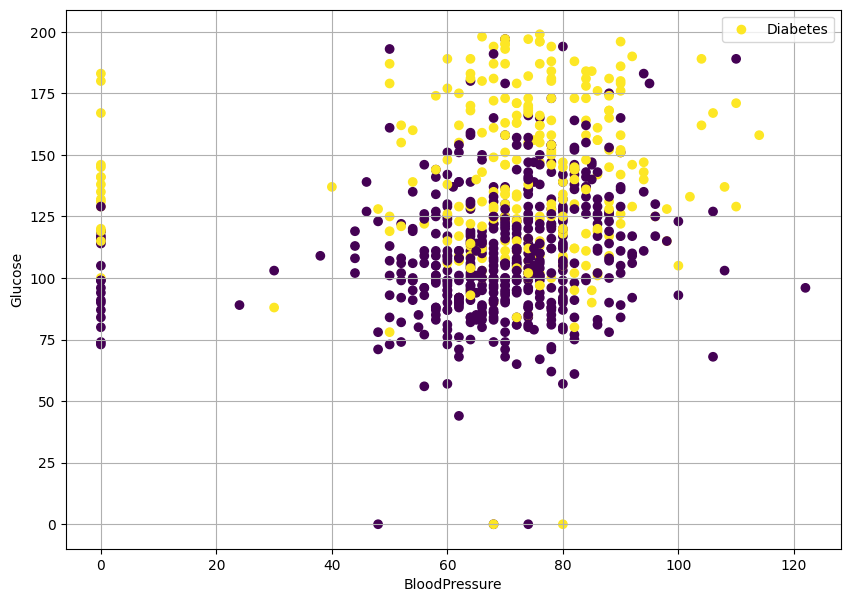

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(data_diabetes['BloodPressure'], data_diabetes['Glucose'], c = data_diabetes.Outcome)
plt.grid()
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
#plt.legend(Diabetes.Outcome.apply(lambda x: 'Diabetes' if x == 1 else 'No Diabetes'))
plt.legend(['Diabetes','No Diabetes'])
plt.show()

In [7]:
data_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### **2) Selección de características**

A través de un mapa de calor de identifican posibles variables correlacionadas.

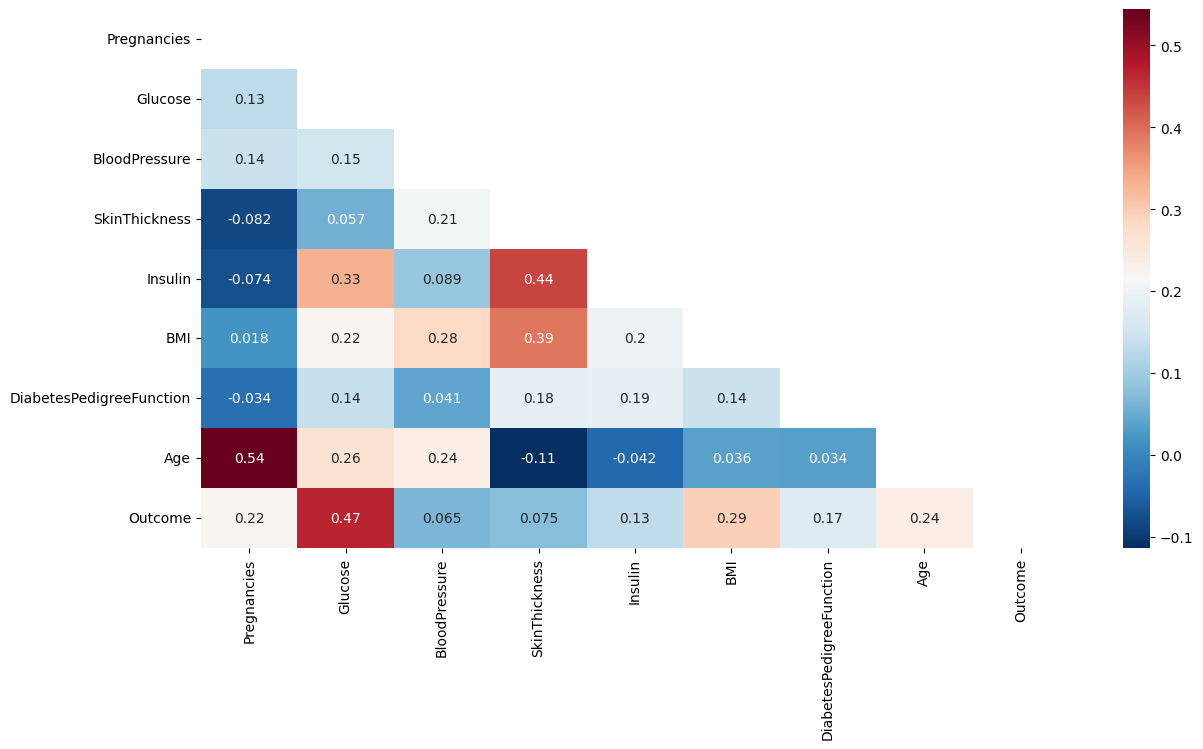

In [8]:
plt.figure(figsize=(14,7))
matriz_inf = np.triu(data_diabetes.corr())
sns.heatmap(data_diabetes.corr(), cmap='RdBu_r', annot=True, mask=matriz_inf)
plt.show()

**Varibles seleccionadas:**

Ante la no presencia de correlaciones altas (fuertes), se consideran a todas las variables para la construcción de los modelos.

#### **3) Definición de las variables predictoras y variable clase**

In [9]:
#Variables predictoras
x = np.array(data_diabetes[['Pregnancies', 
                       'Glucose', 
                       'BloodPressure', 
                       'SkinThickness', 
                       'Insulin', 
                       'BMI',
                       'DiabetesPedigreeFunction',
                       'Age']])
pd.DataFrame(x)

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [10]:
#Variable clase
y = np.array(data_diabetes[['Outcome']])
pd.DataFrame(y)

,0
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


### **II. Creación de los modelos**


#### **Modelo 1: Regresión Logística**

In [11]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [12]:
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [13]:
print(len(x_train))
print(len(x_validation))

614
154


In [14]:
#Se entrena el modelo a partir de los datos de entrada
clasificacion_rl = linear_model.LogisticRegression(max_iter = 150)
clasificacion_rl.fit(x_train, np.ravel(y_train,order='C'))

LogisticRegression(max_iter=150)

In [15]:
#Predicciones probabilísticas
probabilidad = clasificacion_rl.predict_proba(x_validation)
pd.DataFrame(probabilidad)

,0,1
0,0.040124,0.959876
1,0.834820,0.165180
2,0.905328,0.094672
3,0.366525,0.633475
4,0.877078,0.122922
...,...,...
149,0.810158,0.189842
150,0.918264,0.081736
151,0.337790,0.662210
152,0.896800,0.103200


In [16]:
#Clasificación final 
y_clasificacion_rl = clasificacion_rl.predict(x_validation)
print(y_clasificacion_rl)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [17]:
accuracy_score(y_validation, y_clasificacion_rl)

0.8246753246753247

### **III. Validación**

#### **Validación: Regresión Logística**

In [18]:
#Matriz de clasificación
modelo_clasificacion = clasificacion_rl.predict(x_validation)
matriz_clasificacion = pd.crosstab(y_validation.ravel(), 
                                   modelo_clasificacion, 
                                   rownames=['Reales'], 
                                   colnames=['Clasificación']) 
matriz_clasificacion

Clasificación,0,1
Reales,,
0,98,9
1,18,29


In [19]:
#Reporte de la clasificación
print("Exactitud:", accuracy_score(y_validation, y_clasificacion_rl))
print(classification_report(y_validation, y_clasificacion_rl))

Exactitud: 0.8246753246753247
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [20]:
from sklearn.metrics import RocCurveDisplay

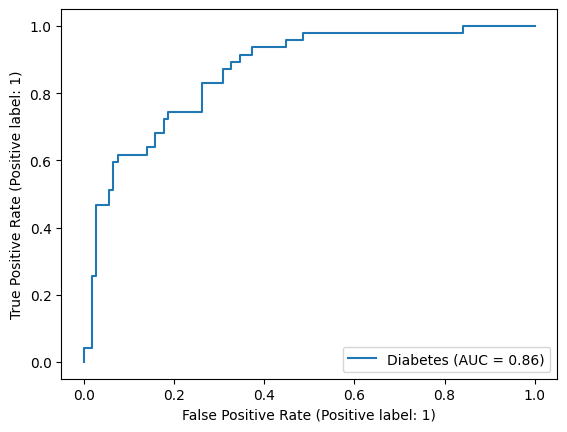

In [21]:
curva_roc = RocCurveDisplay.from_estimator(clasificacion_rl, x_validation, y_validation, name="Diabetes")
plt.show()

### **IV. Nuevas clasificaciones**

In [22]:
#Paciente
paciente_id = pd.DataFrame({0: [1],
                           1: [126],
                           2: [60],
                           3: [23],
                           4: [94],
                           5: [30.1],
                           6: [0.349],
                           7: [47]})
clasificacion_rl.predict(paciente_id)

array([0])